<div style="text-align: center; font-size: 25px;">
Trực quan hóa dữ liệu - CQ2021/21 <br>
Nhóm 02<br>
TLab 02: Working with Time-series data <br>
Chủ đề: Visualize about the climate in Indonesia
</div>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

df_climate = pd.read_csv('climate_data.csv')
df_province = pd.read_csv('province_detail.csv')
df_station = pd.read_csv('station_detail.csv')

# merge 3 csv
df_merg = df_station.merge(df_province, on=["province_id"], how='left')
df_merg_last = df_climate.merge(df_merg, on=["station_id"], how='left')
df = df_merg_last.copy()
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,station_name,region_name,latitude,longitude,region_id,province_id,province_name,year,month,day
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,...,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,2010,1,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,...,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,2010,1,2
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,...,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,2010,1,3
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,...,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,2010,1,4
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,...,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam,2010,1,5


# A. Thu thập dữ liệu

* Ngữ cảnh:
    ...

* Bộ dữ liệu:
    ...

* License:
    ...

* Cách thức thu thập dữ liệu:
    ...

# B. Khám phá dữ liệu

# C. Khám phá mối quan hệ trong dữ liệu

### Temperature

#### Line plot

Lý do chọn biểu đồ: 
* Biểu đồ đường giúp dễ dàng thấy được xu hướng thay đổi nhiệt độ theo thời gian của từng tỉnh (nhiệt độ tỉnh được tính bằng trung bình nhiệt độ của các trạm thuộc tỉnh), đồng thời có thể so sánh nhiệt độ giữa các tính qua từng năm. Biểu đồ được biểu diễn theo năm để dễ dàng hơn cho người xem. 

Lý do chọn màu: 
* Giúp người đọc dễ phân biệt đường nhiệt độ của các tỉnh hơn

Kỹ thuật áp dụng:
* Hover data: Khi người dùng di chuột qua một điểm dữ liệu, một tooltip sẽ xuất hiện hiển thị tất cả giá trị ở điểm dữ liệu đó.
* Zoom và cuộn: Người dùng có thể sử dụng công cụ zoom và cuộn để phóng to hoặc thu nhỏ các phần cụ thể của biểu đồ.
* Selection: người dùng có thể nhấp vào từng province_name ở list bên phải để ẩn hoặc hiện đường nhiệt độ của tỉnh đó trên biểu đồ. Có thể ẩn hoặc hiện tất cả tỉnh bằng nút bên trái

In [17]:
df_temp_year = df.groupby(['year','province_name'],as_index=False)['Tavg'].mean()
fig = px.line(df_temp_year, x="year", y="Tavg", color="province_name")
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [{'visible': 'legendonly'}],
                    'label': 'Ẩn tất cả',
                    'method': 'update'
                },
                {
                    'args': [{'visible': True}],
                    'label': 'Hiển thị tất cả',
                    'method': 'update'
                }
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

fig

Nhận xét:
* Xu hướng nhiệt độ của các tỉnh chia ra nhiều nhóm thể hiện các khu vực có sự tương đồng về điều kiện khí hậu.
* Nhiệt độ của Indonesia có xu hướng tăng dần qua các năm.

Đánh giá sự phù hợp:
* Biểu đồ đường giúp bạn dễ dàng quan sát sự thay đổi của nhiệt độ trung bình (Tavg) theo từng năm (year) của các tỉnh (province_name) khác nhau.
* Vạch kẻ theo màu (hue) giúp phân biệt nhiệt độ trung bình của từng tỉnh theo năm.
* Tuy nhiên, số lượng tỉnh quá nhiều, biểu đồ đường trở nên rối mắt hơn so với các biểu đồ khác như biểu đồ vùng (area plot)

#### Heatmap

Lý do chọn biểu đồ: 
* Heatmap cho phép biểu diễn một lượng lớn dữ liệu trên một diện tích hạn chế. 
* Màu sắc trong Heatmap giúp người dùng dễ dàng so sánh các giá trị nhiệt độ giữa các tháng hoặc năm, cũng như nhận diện xu hướng, mẫu hình hoặc bất thường trong dữ liệu. 
* Các giá trị nhiệt độ cao và thấp sẽ được thể hiện bằng các màu sắc đặc trưng, giúp người dùng nhanh chóng nhận ra sự khác biệt.

Lý do chọn màu sắc: 
* Màu coolwarm cung cấp sự tương phản cao giữa các mức nhiệt độ khác nhau, giúp dễ dàng nhận biết các khu vực nóng và lạnh trên biểu đồ.
* Các sắc thái xanh lam và đỏ biểu diễn các giá trị thấp và cao, dễ phân biệt cho người bị mù màu.
* Việc sử dụng dải màu liên tục từ xanh lam đến đỏ giúp tạo ra hiệu ứng chuyển màu mượt mà, giúp người xem dễ dàng theo dõi sự thay đổi nhiệt độ theo thời gian.
* Màu coolwarm thu hút sự chú ý của người xem đến các vùng cực đoan, nơi có sự biến động nhiệt độ lớn nhất.
* Việc sử dụng màu sắc tươi sáng và rực rỡ có thể giúp thu hút sự chú ý của người xem và khiến họ quan tâm nhiều hơn đến dữ liệu được hiển thị.

Text(0.5, 1.0, 'Heatmap of Temperatures in Indonesia')

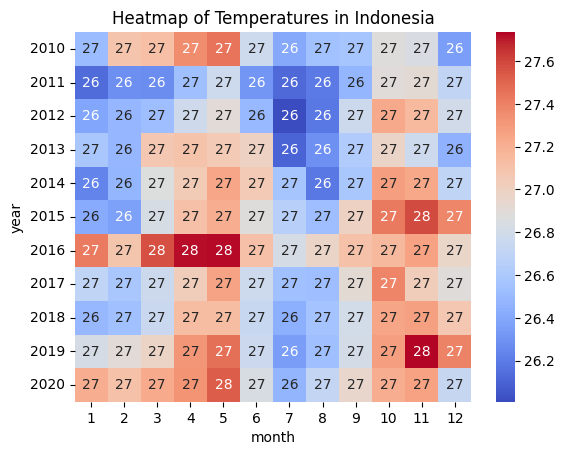

In [22]:
df_temp_month = df.groupby(['year', 'month'],as_index=False)['Tavg'].mean()
matrix = df_temp_month.pivot(index='year', columns='month', values='Tavg')
sns.heatmap(matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Temperatures in Indonesia')

Sau khi sử dụng màu sắc, ta rút ra được nhận xét:

* Chu kỳ
    * Tháng 1-2: nhiệt độ bình thường ở mức 26-27 độ
    * Tháng 3-6, 9-12: nhiệt độ cao nhất trong năm
    * Tháng 7-8: nhiệt độ mát nhất năm
* Nhiệt độ ngày càng cao hơn qua các năm.
* Xuất hiện một số tháng có nhiệt độ cao bất thường.
* Năm 2016 là năm nóng nhất được ghi nhận trong data.

Đánh giá sự phù hợp:
* Sử dụng heatmap trong trường hợp này là phù hợp để tổng quan về sự phân bố nhiệt độ theo tháng qua các năm. 
* Màu sắc thể hiện sự khác biệt của giá trị trung bình nhiệt độ, giúp người xem nhanh chóng nhận ra tháng nào nóng nhất và tháng nào lạnh nhất trong năm.
* Tuy nhiên, khả năng so sánh chi tiết giữa các giá trị nhiệt độ theo từng tháng trong những năm khác nhau trên heatmap có thể khó khăn hơn so với các biểu đồ khác như đường (line) hoặc cột (bar).

### Humid

### Rain

### Sunshine

### Windspeed